<a href="https://colab.research.google.com/github/a78sddrt/Algorithms/blob/main/stockprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses an artificial recurrent neural network called Long Short
#             Term Memory(LSTM) to predict the closing stock price of a corporation (Apple Inc.)
#             using the past 60 day stock price.

In [ ]:
# import the libraries
import math
import pandas_datareader as web
import fix_yahoo_finance
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import requests

plt.style.use('fivethirtyeight')

ModuleNotFoundError: ignored

In [ ]:
#原本發現這裡有錯(見https://stackoverflow.com/questions/68227837/pandas-datareader-not-responding-http-status-404)
#解決方案: !pip install --upgrade pandas-datareader
#Get the stock quote
#Show the data
df = web.DataReader('2330.TW', data_source='yahoo', start='2016-01-01', end='2021-8-29')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,143.5,139.0,142.5,139.5,39169000.0,115.267998
2016-01-05,140.0,137.0,139.0,138.0,46381000.0,114.028549
2016-01-06,138.0,135.0,138.0,135.5,53617000.0,111.962807
2016-01-07,135.0,130.5,134.5,133.0,62539000.0,109.897095
2016-01-08,135.0,132.0,132.0,134.0,50123000.0,110.723381
...,...,...,...,...,...,...
2021-08-23,572.0,559.0,560.0,566.0,33685159.0,566.000000
2021-08-24,575.0,571.0,574.0,572.0,24844800.0,572.000000
2021-08-25,585.0,574.0,579.0,585.0,27504657.0,585.000000


In [ ]:
#這是原本想解決上面問題的其中一個想法，但也失敗(沒辦法取得特定時段日期的資料)
#Get the stock quote
#This is from https://stackoverflow.com/questions/68327968/unable-to-get-stock-data-from-yahoo-with-pandas-datareader
#網址直接到yahoo finance找
#link = 'https://finance.yahoo.com/quote/0056.TW/history?period1=1598659200&period2=1630195200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'
#r = requests.get(link, headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
#pandas_data = pd.read_html(r.text)
#pandas_data

In [ ]:
#Get the number of rows and columns in the data set
df.shape

(1375, 6)

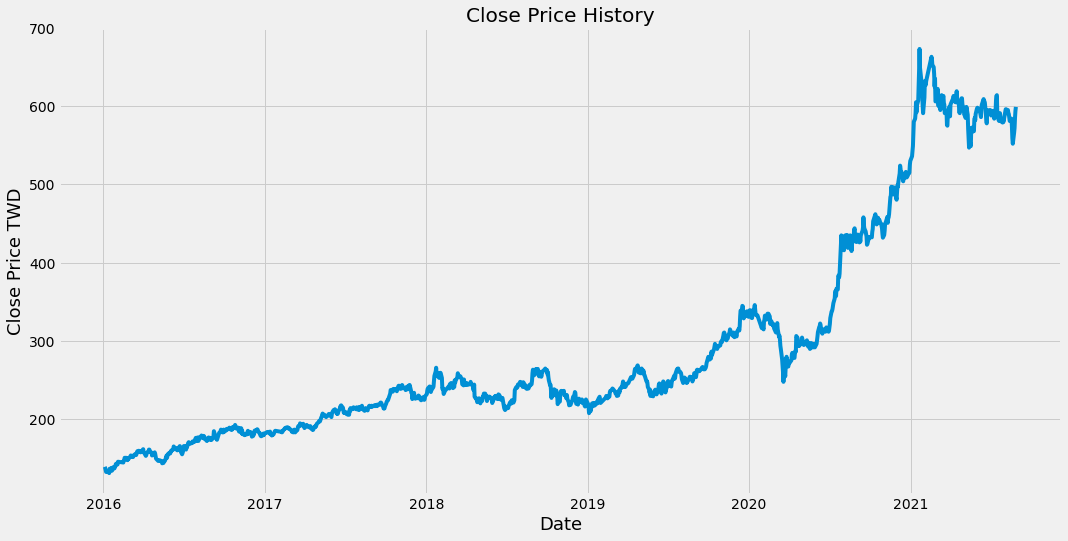

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price TWD', fontsize=18)
plt.show()


In [ ]:
#Create a new dataframe with only the 'Close colume'
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to trains the model on
#Use 80% data to train
training_data_len=math.ceil(len(dataset)* .8)

training_data_len

1100

In [ ]:
#Scale the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)

scaled_data

array([[0.01477378],
       [0.01200369],
       [0.00738689],
       ...,
       [0.83748846],
       [0.85410896],
       [0.86334257]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01477378, 0.01200369, 0.00738689, 0.00277008, 0.00461681,
       0.00277008, 0.00277008, 0.00369344, 0.        , 0.01015697,
       0.01015697, 0.01200369, 0.00554017, 0.00646353, 0.01292705,
       0.01477378, 0.01108033, 0.01477378, 0.01569714, 0.0212373 ,
       0.02308403, 0.02031394, 0.02677747, 0.02493075, 0.02954755,
       0.03047091, 0.03601108, 0.03601108, 0.03601108, 0.033241  ,
       0.03047091, 0.03508772, 0.03231764, 0.0378578 , 0.03970452,
       0.04155125, 0.03878116, 0.0378578 , 0.0378578 , 0.03970452,
       0.04247461, 0.04339797, 0.04524469, 0.04247461, 0.04524469,
       0.0498615 , 0.05170822, 0.05263158, 0.0498615 , 0.05170822,
       0.0498615 , 0.04893813, 0.05078486, 0.05078486, 0.05540166,
       0.05632502, 0.0498615 , 0.04062789, 0.04247461, 0.04801477])]
[0.04986149584487534]

[array([0.01477378, 0.01200369, 0.00738689, 0.00277008, 0.00461681,
       0.00277008, 0.00277008, 0.00369344, 0.        , 0.01015697,
       0.01015697, 0.01200369, 0.00

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape =(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1040/1040 [==============================] - 35s 31ms/step - loss: 5.4044e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1892 to 2365
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)
x_test.shape

(275, 60)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test)**2)
rmse

5.933833229758522

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


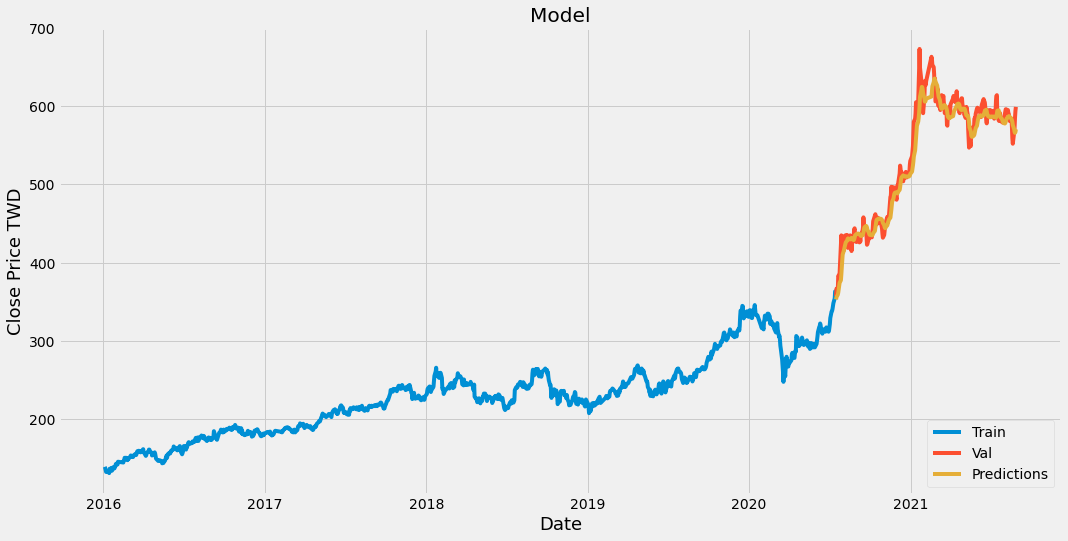

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price TWD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-07-16,357.5,353.173950
2020-07-17,367.0,356.213989
2020-07-20,366.0,359.354004
2020-07-21,383.0,362.046936
2020-07-22,384.0,366.117218
...,...,...
2021-08-23,566.0,570.743286
2021-08-24,572.0,567.338379
2021-08-25,585.0,565.859131


In [ ]:
#Get the quote
quote = web.DataReader('2330.TW', data_source='yahoo', start='2016-01-01', end='2021-8-29')
#Create a new dataframe
new_df = quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scalar.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

[[575.00684]]
